# Assignment 2: **Machine learning with tree based models** 

In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

In [0]:
import pandas as pd 

In [0]:
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
titanic_data.shape

(891, 12)

In [0]:
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [0]:
titanic_data['Sex'] = titanic_data['Sex'].apply(lambda x:0 if x=="male" else 1)
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [0]:
titanic_data.dropna(axis = 1, inplace=True) # Dropping column

In [0]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare'],
      dtype='object')

In [0]:
titanic_data.index

RangeIndex(start=0, stop=891, step=1)

In [0]:
titanic_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

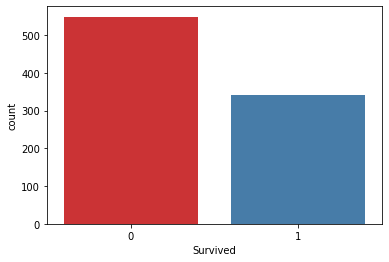

In [0]:
sns.countplot(titanic_data.Survived, palette='Set1')
plt.show()

In [0]:
titanic_data.Sex.value_counts()


0    577
1    314
Name: Sex, dtype: int64

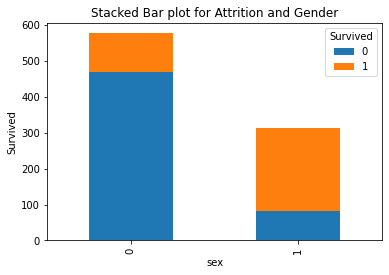

In [0]:
# 0- Male and 1-female
crosstab_sex = pd.crosstab(titanic_data.Sex,titanic_data.Survived)
crosstab_sex.plot(kind='bar',stacked = True)
plt.xlabel('sex')
plt.ylabel('Survived')
plt.title('Stacked Bar plot for Attrition and Gender')
plt.show()

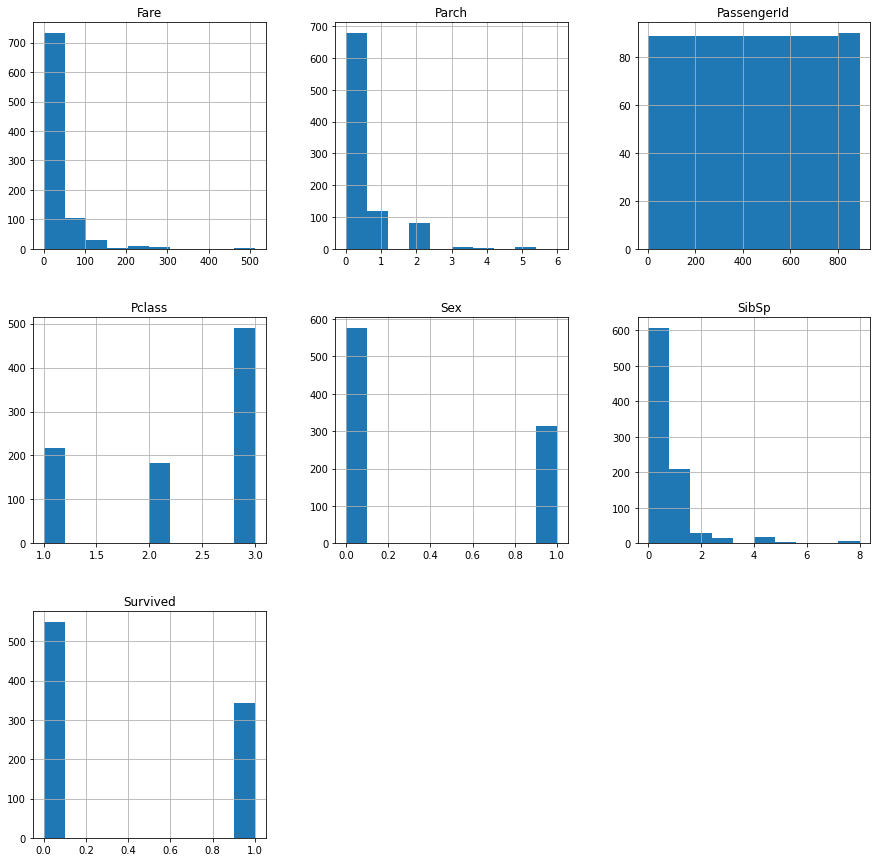

In [0]:
titanic_data.hist(figsize=(15,15))
plt.show()

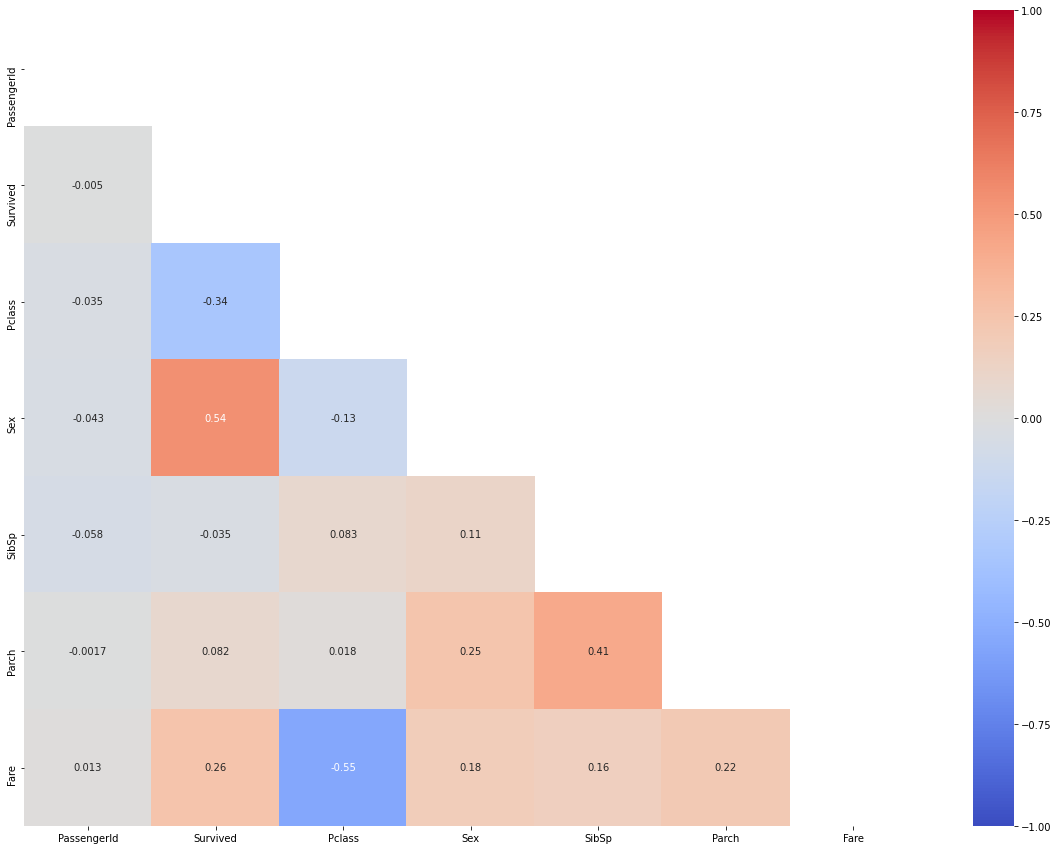

In [0]:
## Visulizing heat map
plt.figure(figsize=(20,15))
mask = np.zeros_like(titanic_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(  titanic_data.corr(),
              vmin=-1,
              cmap="coolwarm",
              annot=True,
              mask=mask
            )
plt.show()

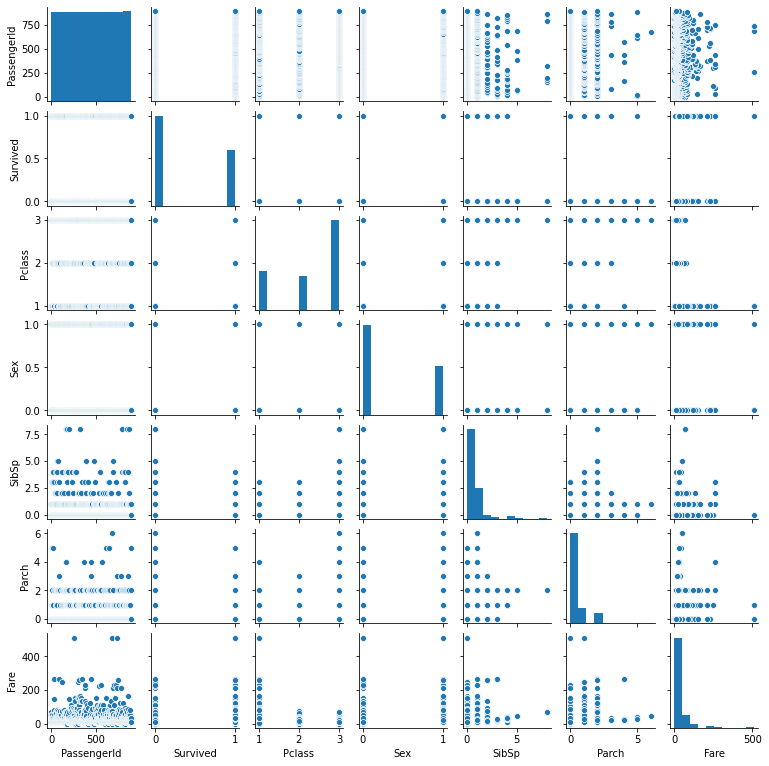

In [0]:
sns.pairplot(titanic_data,height=1.5)
plt.show()

In [0]:
titanic_data.Sex.value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [0]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import metrics

**DecisionTreeClassifier**

In [0]:
X = titanic_data.drop(['Survived','Name','Ticket'],axis=1)
y = titanic_data['Survived']

In [0]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [119]:
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1) 
# dt = DecisionTreeClassifier(max_depth=6, criterion='gini', random_state=1)
# default=gini

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [120]:
# Predict test set labels
y_pred = dt.predict(X_test)
# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.80


In [0]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



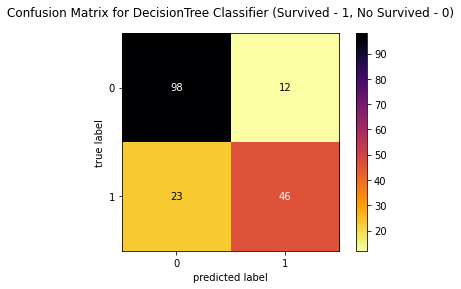

In [0]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=cm, cmap='inferno_r',colorbar=True)
plt.title('Confusion Matrix for DecisionTree Classifier (Survived - 1, No Survived - 0)')
plt.show()

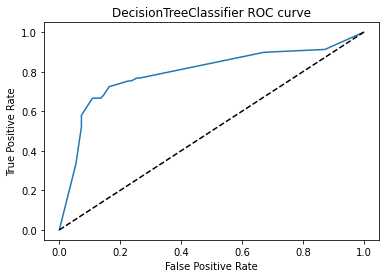

In [0]:
from sklearn.metrics import roc_curve  
probs = dt.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DecisionTreeClassifier ROC curve')
# show the plot
plt.show()

**Ensemble learning**

In [0]:
# Import models, including VotingClassifier meta-model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier


In [0]:
# Set seed for reproducibility
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= SEED)

# Instantiate individual classifiers
lr = LogisticRegression(random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(random_state=SEED)

# Define a list called classifier that contains the tuples (classifier_name, classifier)

classifiers = [('Logistic Regression', lr),
('K Nearest Neighbours', knn),
('Classification Tree', dt)]

In [122]:
for a,s in classifiers:
  print("{},{}".format(a,s))

Logistic Regression,LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
K Nearest Neighbours,KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Classification Tree,DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')


In [123]:
import warnings
warnings.filterwarnings("ignore")

# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:

  #fit clf to the training set
  clf.fit(X_train, y_train)

  # Predict the labels of the test set
  y_pred = clf.predict(X_test)

  # Evaluate the accuracy of clf on the test set
  print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

Logistic Regression : 0.782
K Nearest Neighbours : 0.603
Classification Tree : 0.760


In [124]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       106
           1       0.75      0.62      0.68        73

    accuracy                           0.76       179
   macro avg       0.76      0.74      0.74       179
weighted avg       0.76      0.76      0.75       179



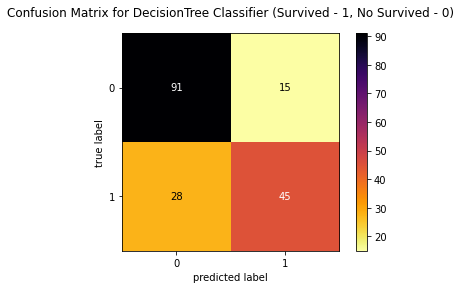

In [125]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=cm, cmap='inferno_r',colorbar=True)
plt.title('Confusion Matrix for DecisionTree Classifier (Survived - 1, No Survived - 0)')
plt.show()

**Bagging**

Bagging is an ensemble method involving training the same algorithm many times using different subsets sampled from the training data.

In [0]:
from sklearn.ensemble import BaggingClassifier

In [0]:
SEED = 1
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=SEED)

In [128]:
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)

# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1) # n_jobs=-1 means that all the CPU cores are used in computation. 

# Fit 'bc' to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

Accuracy of Bagging Classifier: 0.802


**Boosting**

Boosting refers to an ensemble method in which several models are trained sequentially with each model learning from the errors of its predecessors.

In [0]:
# Import models and utility functions
from sklearn.ensemble import AdaBoostClassifier

In [107]:
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=1, random_state=SEED)
# Instantiate an AdaBoost classifier 'adab_clf'
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100)
# Fit 'adb_clf' to the training set
adb_clf.fit(X_train, y_train)
# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Adaboost Classifier: {:.3f}'.format(accuracy))

Accuracy of Adaboost Classifier: 0.802
